In [31]:
import torch
import torch.nn as nn
import torch.optim as optim 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader 

In [32]:
# Load the dataset 

transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)


In [33]:
# Define the model
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 10),
            nn.LogSoftmax(dim=1)
        )
    
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
 
model = FashionMNISTModel()

In [34]:
# Define the loss function and optimizer
loss_function = nn.NLLLoss()
optimizer = optim.Adam(model.parameters())

In [ ]:
# Train the model
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()

    total_loss = 0
    total_accuracy = 0

    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)
        accuracy = get_accuracy(pred, y)

        total_loss += loss.item()
        total_accuracy += accuracy.item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
 
        if batch % 100 == 0:
            current = batch * len(X)
            avg_loss = total_loss / (batch + 1)
            avg_accuracy = total_accuracy / (batch + 1) * 100
            print(f"Batch {batch}, Loss: {avg_loss:>7f}, "
                  f"Accuracy: {avg_accuracy:>0.2f}% "
                  f"[{current:>5d}/{size:>5d}]")
         if avg_accuracy >= 95:
                print("Reached 95% accuracy, stopping training.")
                return True

# Function to calculate accuracy
def get_accuracy(pred, labels):
    _, predictions = torch.max(pred, 1)
    correct = (predictions == labels).float().sum()
    accuracy = correct / labels.shape[0]
    return accuracy

 




In [36]:
# Training process
epochs = 50
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_loader, model, loss_function, optimizer)
print("Done!")

Epoch 1
-------------------------------
Batch 0, Loss: 2.337414, Accuracy: 3.12% [    0/60000]
Batch 100, Loss: 0.969327, Accuracy: 67.90% [ 6400/60000]
Batch 200, Loss: 0.789062, Accuracy: 73.64% [12800/60000]
Batch 300, Loss: 0.708814, Accuracy: 76.01% [19200/60000]
Batch 400, Loss: 0.660531, Accuracy: 77.47% [25600/60000]
Batch 500, Loss: 0.624799, Accuracy: 78.63% [32000/60000]
Batch 600, Loss: 0.599226, Accuracy: 79.41% [38400/60000]
Batch 700, Loss: 0.578969, Accuracy: 80.07% [44800/60000]
Batch 800, Loss: 0.561633, Accuracy: 80.63% [51200/60000]
Batch 900, Loss: 0.550510, Accuracy: 81.02% [57600/60000]
Epoch 2
-------------------------------
Batch 0, Loss: 0.440707, Accuracy: 81.25% [    0/60000]
Batch 100, Loss: 0.414023, Accuracy: 85.16% [ 6400/60000]
Batch 200, Loss: 0.423252, Accuracy: 84.90% [12800/60000]
Batch 300, Loss: 0.416092, Accuracy: 85.21% [19200/60000]
Batch 400, Loss: 0.412465, Accuracy: 85.44% [25600/60000]
Batch 500, Loss: 0.408444, Accuracy: 85.63% [32000/6000

In [37]:
def test(dataloader, model):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()  # Set the model to evaluation mode
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_function(pred, y).item()
            correct += (pred.argmax(1) == 
                        y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
 
# Evaluate the model
test(test_loader, model)

Test Error: 
 Accuracy: 88.8%, Avg loss: 0.435063 



tensor([[-3.4240e+01, -4.0967e+01, -2.6300e+01, -2.6986e+01, -3.0091e+01,
         -1.5191e+01, -2.7613e+01, -9.5765e+00, -3.2009e+01, -6.9616e-05]])


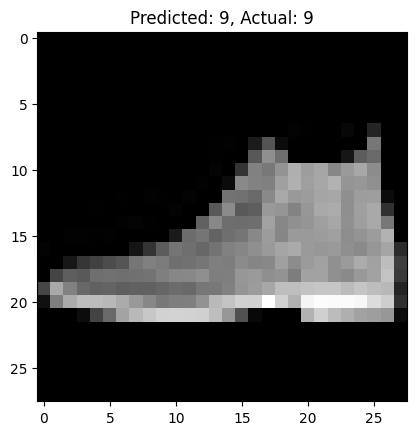

The model predicted 9, and the actual label is 9.


In [38]:
import matplotlib.pyplot as plt
 
def predict_single_image(image, label, model):
    # Set the model to evaluation mode
    model.eval()
 
# Unsqueeze image as the model expects a batch dimension
    image = image.unsqueeze(0)
 
    with torch.no_grad():
        prediction = model(image)
        print(prediction)
        predicted_label = prediction.argmax(1).item()
 
    # Display the image and predictions
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'Predicted: {predicted_label}, Actual: {label}')
    plt.show()
 
    return predicted_label
 
# Choose an image from the test set
image, label = test_dataset[0]  # Change index to test different images
 
# Predict the class for the chosen image
predicted_label = predict_single_image(image, label, model)
print(f"The model predicted {predicted_label}, and the actual label is {label}.")